# Restaurant Recommendation #

## Introduction ##
This report analyzes a dataset of restaurant information to build a recommendation system. The dataset contains information about restaurants, customers, and orders. The goal is to recommend vendors to new customers based on their characteristics and past order history.In this project, we will analyze dataset of restaurant to build recommendation system for restaurants.

## Dataset Description ##

This [dataset](https://www.kaggle.com/datasets/mrmorj/restaurant-recommendation-challenge/data) contains information on restaurants. 

There are ~10,000 customers in the test set. These are the customers you will need to recommend a vendor to. Each customer can order from multiple locations (LOC_NUM).

There are ~35,000 customers in the train set. Some of these customers have made orders at at least one of 100 vendors.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read data
vendors = pd.read_csv('vendors.csv')

In [4]:
vendors.head()

,id,authentication_id,latitude,longitude,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,...,open_close_flags,vendor_tag,vendor_tag_name,one_click_vendor,country_id,city_id,created_at,updated_at,device_type,display_orders
0,4,118597.0,-0.588596,0.754434,Restaurants,2.0,0.0,6.0,1.0,11:00AM-11:30PM,...,1.0,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",Y,1.0,1.0,2018-01-30 14:42:04,2020-04-07 15:12:43,3,1
1,13,118608.0,-0.471654,0.744470,Restaurants,2.0,0.7,5.0,1.0,08:30AM-10:30PM,...,1.0,"4,41,51,34,27,15,24,16,28","Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",Y,1.0,1.0,2018-05-03 12:32:06,2020-04-05 20:46:03,3,1
2,20,118616.0,-0.407527,0.643681,Restaurants,2.0,0.0,8.0,1.0,08:00AM-10:45PM,...,1.0,"4,8,91,10","Breakfast,Desserts,Free Delivery,Indian",Y,1.0,1.0,2018-05-04 22:28:22,2020-04-07 16:35:55,3,1
3,23,118619.0,-0.585385,0.753811,Restaurants,2.0,0.0,5.0,1.0,10:59AM-10:30PM,...,1.0,"5,8,30,24","Burgers,Desserts,Fries,Salads",Y,1.0,1.0,2018-05-06 19:20:48,2020-04-02 00:56:17,3,1
4,28,118624.0,0.480602,0.552850,Restaurants,2.0,0.7,15.0,1.0,11:00AM-11:45PM,...,1.0,5,Burgers,Y,1.0,1.0,2018-05-17 22:12:38,2020-04-05 15:57:41,3,1


In [5]:
vendors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    100 non-null    int64  
 1   authentication_id     100 non-null    float64
 2   latitude              100 non-null    float64
 3   longitude             100 non-null    float64
 4   vendor_category_en    100 non-null    object 
 5   vendor_category_id    100 non-null    float64
 6   delivery_charge       100 non-null    float64
 7   serving_distance      100 non-null    float64
 8   is_open               100 non-null    float64
 9   OpeningTime           91 non-null     object 
 10  OpeningTime2          91 non-null     object 
 11  prepration_time       100 non-null    int64  
 12  commission            85 non-null     float64
 13  is_akeed_delivering   100 non-null    object 
 14  discount_percentage   100 non-null    float64
 15  status                10

In [6]:
vendors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    100 non-null    int64  
 1   authentication_id     100 non-null    float64
 2   latitude              100 non-null    float64
 3   longitude             100 non-null    float64
 4   vendor_category_en    100 non-null    object 
 5   vendor_category_id    100 non-null    float64
 6   delivery_charge       100 non-null    float64
 7   serving_distance      100 non-null    float64
 8   is_open               100 non-null    float64
 9   OpeningTime           91 non-null     object 
 10  OpeningTime2          91 non-null     object 
 11  prepration_time       100 non-null    int64  
 12  commission            85 non-null     float64
 13  is_akeed_delivering   100 non-null    object 
 14  discount_percentage   100 non-null    float64
 15  status                10

In [7]:
print(vendors['OpeningTime'].isnull().sum())

9


## Handling Missing Values ##

In [9]:
print(vendors[vendors['OpeningTime'].isnull()])

     id  authentication_id   latitude  longitude vendor_category_en  \
91  841           130436.0  -0.496138   0.740214        Restaurants   
92  843           130447.0  -1.269317   0.082343        Restaurants   
93  845           130450.0  -0.116904   0.181583        Restaurants   
94  846           130451.0  -0.441823   0.099479        Restaurants   
95  849           130455.0  -1.588060  -0.066441        Restaurants   
96  855           130463.0   2.145206   0.745025        Restaurants   
97  856           130464.0   0.251469   0.483632        Restaurants   
98  858           130468.0   0.019817   0.587087        Restaurants   
99  907           132953.0  13.335131  -1.449556        Restaurants   

    vendor_category_id  delivery_charge  serving_distance  is_open  \
91                 2.0              0.0               6.0      1.0   
92                 2.0              0.0               5.0      1.0   
93                 2.0              0.0               5.0      1.0   
94       

After considering `is_open`, `preparation_time`, and `vendor_rating`, we will fill those null values with '24/7', indicating the restaurants operates 24 hours a day.

In [11]:
vendors['OpeningTime'] = vendors['OpeningTime'].fillna('24/7')
vendors['OpeningTime'].isnull().sum()

0

In [12]:
# Read the second data 
train_customers = pd.read_csv('train_customers.csv')

In [13]:
train_customers.head()

,akeed_customer_id,gender,dob,status,verified,language,created_at,updated_at
0,TCHWPBT,Male,NaN,1,1,EN,2018-02-07 19:16:23,2018-02-07 19:16:23
1,ZGFSYCZ,Male,NaN,1,1,EN,2018-02-09 12:04:42,2018-02-09 12:04:41
2,S2ALZFL,Male,NaN,0,1,EN,2018-03-14 18:31:43,2018-03-14 18:31:42
3,952DBJQ,Male,NaN,1,1,EN,2018-03-15 19:47:07,2018-03-15 19:47:07
4,1IX6FXS,Male,NaN,1,1,EN,2018-03-15 19:57:01,2018-03-15 19:57:01


In [14]:
train_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34674 entries, 0 to 34673
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   akeed_customer_id  34674 non-null  object 
 1   gender             22520 non-null  object 
 2   dob                3046 non-null   float64
 3   status             34674 non-null  int64  
 4   verified           34674 non-null  int64  
 5   language           21099 non-null  object 
 6   created_at         34674 non-null  object 
 7   updated_at         34674 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.1+ MB


In [15]:
train_customers.describe()

,dob,status,verified
count,3046.000000,34674.000000,34674.000000
mean,1991.210768,0.998991,0.956538
std,48.422045,0.031756,0.203898
min,1.000000,0.000000,0.000000
25%,1986.000000,1.000000,1.000000
50%,1993.000000,1.000000,1.000000
75%,1999.000000,1.000000,1.000000
max,2562.000000,1.000000,1.000000


In [16]:
train_customers.describe(include = 'object')

,akeed_customer_id,gender,language,created_at,updated_at
count,34674,22520,21099,34674,34674
unique,34523,10,1,33650,29409
top,0FOCFVI,Male,EN,2019-10-14 12:20:33,2019-10-01 18:50:31
freq,17,17815,21099,7,15


#### Numerical Colums:  ####

1. `dob` (Date of Birth):
    - It has only 3046 entries out of 34674, indicating a high level of missing values(~91% missing). 
    - The standard deviation is quite high (48.42), which suggests there are some extreme values. 
    - The minimum value is 1 and maximum value is 2562, which clearly indicates some erroneous entries (birth years shiuld generally between 1900 and current year).

2. `status`:
    - Almost all accounts have a status of 1, with very few having a status of 0. This indicates that most accounts are likely active or in a certain confirmed state.

3. `verified`:
    - Most accounts are verified (0.96), with a mean very close to 1, and very few unverified accounts (std is 0.20).

#### Categorical Columns: ####

1. `akeed_customer_id`:
     - Each customer is almost unique, with 34523 unique IDs out of 34674 entries.
     - The most frequent ID (`0FOCFVI`) appears 17 times, which may indicate duplicate or test entries.
     
2. `gender`:
     - There are 10 unique values for gender, but the most frequent gender is 'Male' (17815 out of 22520 entries with non-null gender).
     - There are significant missing values in this column (12154 missing entries, ~35%).
     
3. `Language`:
    - All non-null entries have the same value ('EN'), suggesting that language may not provide much variability for this dataset.

4. `created_at` and `updated_at`:
    - There are many unique timestamps for both columns, indicating that the account creation and update times are very detailed.
    - The most frequent timestamps only appear a few times, which may correspond to batch processing times or system defaults.

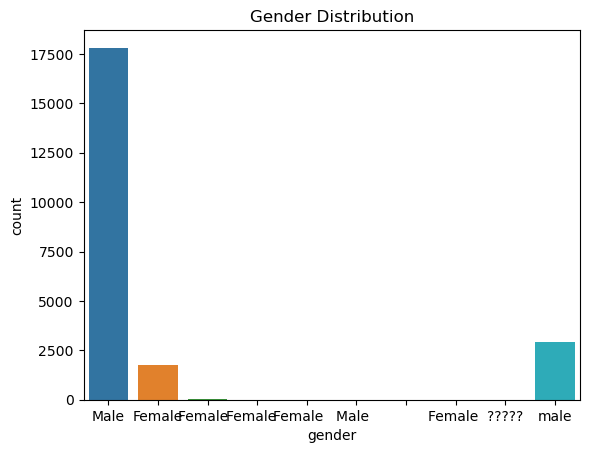

In [18]:
# Gender distribution
sns.countplot(x='gender', data=train_customers)
plt.title('Gender Distribution')
plt.show()

In [19]:
train_customers['gender'].unique()

array(['Male', 'Female', 'Female  ', 'Female   ', 'Female    ', 'Male  ',
       '  ', 'Female ', nan, '?????', 'male'], dtype=object)

There are lot of duplicate values so we will replace this values.

In [21]:
train_customers['gender'] = train_customers['gender'].replace({'Female  ' : 'Female', 'Female   ' : 'Female', 'Female    ' : 'Female', 
                                                               'Male  ' : 'Male', 'Female ' : 'Female', 'male' : 'Male', 
                                                               '?????': 'Unknown', '  ' : 'Unknown'}
                                                             )

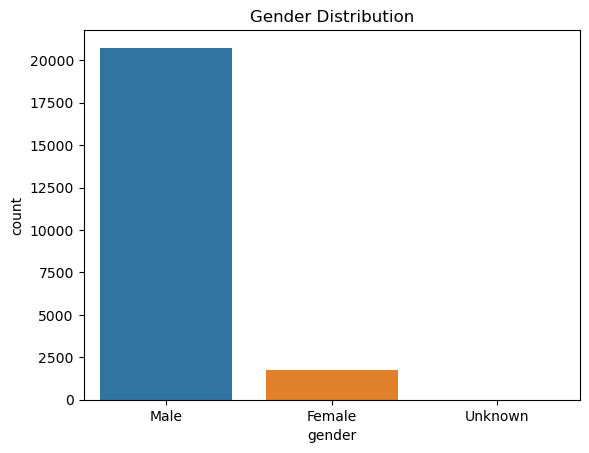

In [22]:
# Gender distribution
sns.countplot(x='gender', data=train_customers)
plt.title('Gender Distribution')
plt.show()

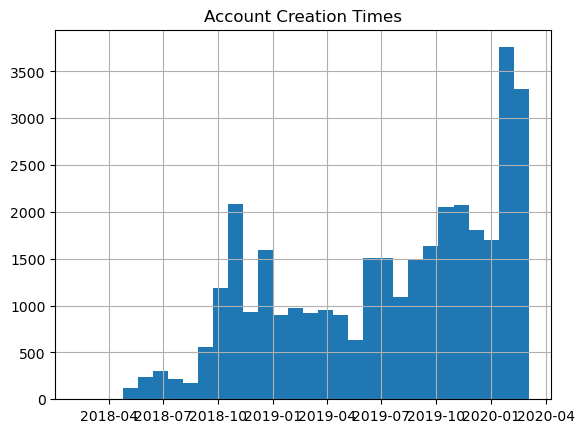

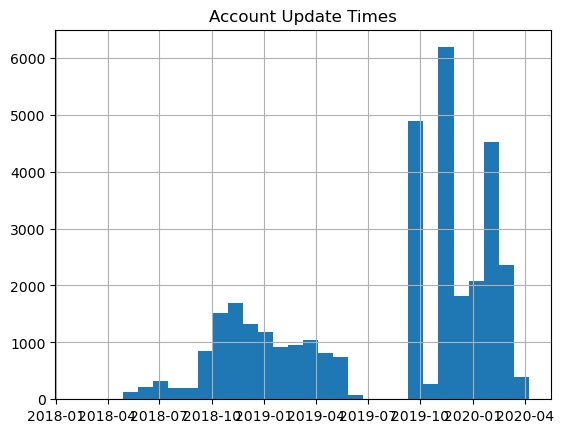

In [23]:
# Account creation times
train_customers['created_at'] = pd.to_datetime(train_customers['created_at'])
train_customers['updated_at'] = pd.to_datetime(train_customers['updated_at'])
train_customers['created_at'].hist(bins=30)
plt.title('Account Creation Times')
plt.show()

train_customers['updated_at'].hist(bins=30)
plt.title('Account Update Times')
plt.show()

`Account Creation Times`:
- There is a general upward trend in account creation, indicating growth in user base over time.
- Peaks can be observed at specific intervals, which may correspond to marketing campaigns, promotions, or seasonal trends.
- The highest peak appears in early 2020, suggesting a significant increase in new user registrations around this time.

`Account Update Times`:
- There are distinct peaks, especially towards the latter part of the timeline (early 2020).
- The highest spike in account updates occurs in early 2020, which could correlate with the peak in account creations or an event that prompted users to update their accounts.
- The frequent updates in certain periods suggest high user engagement or possibly system-wide updates prompting users to update their information.

### Data Preprocessing ###

In [26]:
# Handling missing values
train_customers['gender'].fillna('Unknown', inplace=True)
train_customers['language'].fillna('EN', inplace=True)
train_customers['dob'].fillna(-1, inplace=True)

In [27]:
# Removing erroneous `dob` entries
train_customers = train_customers[(train_customers['dob'] > 1900) & (train_customers['dob'] <= pd.Timestamp.now().year)]

In [28]:
# Encoding categorical variables
train_customers['gender'] = train_customers['gender'].astype('category').cat.codes
train_customers['language'] = train_customers['language'].astype('category').cat.codes

In [29]:
# Feature engineering: Age
current_year = pd.Timestamp.now().year
train_customers['age'] = current_year - train_customers['dob'].astype(int)
train_customers.loc[train_customers['dob'] == -1, 'age'] = -1  # Preserve missing DOB as -1

In [30]:
# Convert created_at and updated_at to datetime
train_customers['created_at'] = pd.to_datetime(train_customers['created_at'])
train_customers['updated_at'] = pd.to_datetime(train_customers['updated_at'])

### Preparing Data for Recommendation Sytem ###

In [32]:
#load another dataset
train_locations = pd.read_csv('train_locations.csv')
train_orders = pd.read_csv('orders.csv', low_memory=False)

In [33]:
# Merging datasets
data = train_orders.merge(train_customers, left_on = 'customer_id', right_on='akeed_customer_id')
data = data.rename(columns={'LOCATION_NUMBER': 'location_number'})
data = data.merge(train_locations, on=['customer_id', 'location_number'])

In [34]:
data = data.merge(vendors, left_on='vendor_id', right_on='id')

In [35]:
data.columns

Index(['akeed_order_id', 'customer_id', 'item_count', 'grand_total',
       'payment_mode', 'promo_code', 'vendor_discount_amount',
       'promo_code_discount_percentage', 'is_favorite', 'is_rated',
       'vendor_rating_x', 'driver_rating', 'deliverydistance',
       'preparationtime', 'delivery_time', 'order_accepted_time',
       'driver_accepted_time', 'ready_for_pickup_time', 'picked_up_time',
       'delivered_time', 'delivery_date', 'vendor_id', 'created_at_x',
       'location_number', 'LOCATION_TYPE', 'CID X LOC_NUM X VENDOR',
       'akeed_customer_id', 'gender', 'dob', 'status_x', 'verified_x',
       'language_x', 'created_at_y', 'updated_at_x', 'age', 'location_type',
       'latitude_x', 'longitude_x', 'id', 'authentication_id', 'latitude_y',
       'longitude_y', 'vendor_category_en', 'vendor_category_id',
       'delivery_charge', 'serving_distance', 'is_open', 'OpeningTime',
       'OpeningTime2', 'prepration_time', 'commission', 'is_akeed_delivering',
       'discoun

In [36]:
# Select relevant features
features = [
    'customer_id', 'gender', 'age', 'location_number',
    'vendor_id', 'vendor_category_en', 'vendor_rating_y', 'vendor_tag_name',
    'item_count', 'grand_total', 'payment_mode', 'deliverydistance',
    'preparationtime', 'delivery_time', 'is_favorite', 'is_rated',
    'driver_rating', 'delivery_date', 'created_at'
]

# Checking the final data
data.head()

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,open_close_flags,vendor_tag,vendor_tag_name,one_click_vendor,country_id,city_id,created_at,updated_at_y,device_type,display_orders
0,163274.0,IU4IHX1,1.0,5.7,1,NaN,0.0,NaN,NaN,No,...,1.0,"5,30,22,47,52,16,56","Burgers,Fries,Grills,Mishkak,Mojitos ,Sandwich...",Y,1.0,1.0,2019-03-10 13:05:09,2020-04-03 14:43:26,3,1
1,145211.0,IU4IHX1,2.0,8.4,1,NaN,0.0,NaN,NaN,No,...,1.0,"5,30,22,47,52,16,56","Burgers,Fries,Grills,Mishkak,Mojitos ,Sandwich...",Y,1.0,1.0,2019-03-10 13:05:09,2020-04-03 14:43:26,3,1
2,152530.0,IU4IHX1,1.0,3.8,1,NaN,0.0,NaN,NaN,No,...,1.0,"5,30,22,47,52,16,56","Burgers,Fries,Grills,Mishkak,Mojitos ,Sandwich...",Y,1.0,1.0,2019-03-10 13:05:09,2020-04-03 14:43:26,3,1
3,154425.0,IU4IHX1,1.0,7.6,1,NaN,0.0,NaN,NaN,No,...,1.0,"5,30,22,47,52,16,56","Burgers,Fries,Grills,Mishkak,Mojitos ,Sandwich...",Y,1.0,1.0,2019-03-10 13:05:09,2020-04-03 14:43:26,3,1
4,152317.0,NYDQ8RO,4.0,6.3,1,NaN,0.0,NaN,NaN,No,...,1.0,"5,30,22,47,52,16,56","Burgers,Fries,Grills,Mishkak,Mojitos ,Sandwich...",Y,1.0,1.0,2019-03-10 13:05:09,2020-04-03 14:43:26,3,1


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11844 entries, 0 to 11843
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   akeed_order_id                  11836 non-null  float64       
 1   customer_id                     11844 non-null  object        
 2   item_count                      11183 non-null  float64       
 3   grand_total                     11844 non-null  float64       
 4   payment_mode                    11844 non-null  int64         
 5   promo_code                      401 non-null    object        
 6   vendor_discount_amount          11844 non-null  float64       
 7   promo_code_discount_percentage  5521 non-null   float64       
 8   is_favorite                     8567 non-null   object        
 9   is_rated                        11844 non-null  object        
 10  vendor_rating_x                 3971 non-null   float64       
 11  dr

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


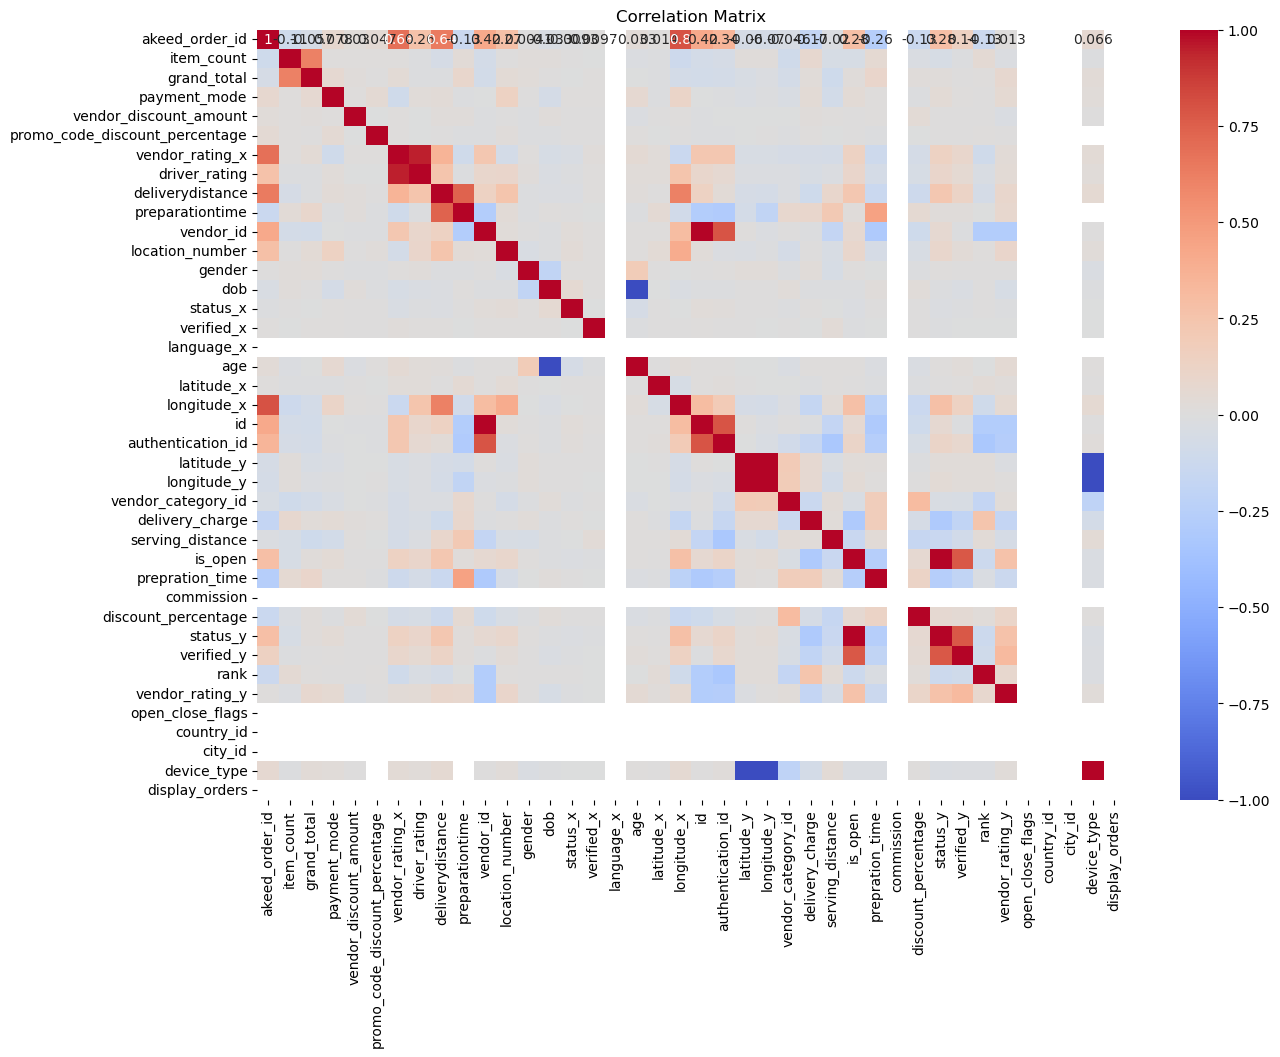

In [38]:
# Filter only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Check if there are non-numeric columns that should be numeric and convert them
# For example, if 'vendor_rating_y' should be numeric but is stored as a string
if 'vendor_rating_y' in data.columns:
    data['vendor_rating_y'] = pd.to_numeric(data['vendor_rating_y'], errors='coerce')

# Re-filter numeric columns after conversion
numeric_data = data.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plot correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Here are some observations:
- The correlation matrix is mostly filled with low correlations. This suggests that the features in the dataset are not strongly correlated with each other.
- There is a strong positive correlation between `grand_total` and `item_count`, which is expected.
- There is a strong negative correlation between `akeed_order_id` and `verified_x`. This suggests that customers who have not verified their accounts are less likely to place orders.
- There is a moderate positive correlation between `vendor_rating_x` and `vendor_rating_y`. This suggests that vendors who are rated highly by customers are also more likely to be rated highly by other vendors.

Overall, the correlation matrix provides a useful overview of the relationships between the features in the dataset. It can be used to identify potential problems with the data, such as multicollinearity, and to guide feature selection for machine learning models.

## Feature Selection ##
To build a recommendation system, here are some features that we can consider using:
- `grand_total`
- `item_count`
- `akeed_order_id`
- `verified_x`
- `vendor_rating_x`
- `vendor_rating_y`

In [41]:
# Convert vendor_tag_name to lowercase
data['vendor_tag_name'] = data['vendor_tag_name'].str.lower()

## Building Recommendation System ##
We will use Collaborative Filtering using Singular Value Decomposition (SVD) and Content Based Filtering using TF-IDF vectorization and cosine similarity to build recommendation system.

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.model_selection import train_test_split

In [44]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split as surprise_train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'data' is your DataFrame
# Prepare the ratings data
ratings_data = data[['customer_id', 'vendor_id', 'vendor_rating_y']].rename(columns={
    'customer_id': 'userID',
    'vendor_id': 'itemID',
    'vendor_rating_y': 'rating'
})

# Define the reader with the appropriate rating scale
reader = Reader(rating_scale=(0, 5))

# Load ratings data into Surprise Dataset
ratings_dataset = Dataset.load_from_df(ratings_data, reader)

# Split Surprise Dataset into train and test sets
trainset, testset = surprise_train_test_split(ratings_dataset, test_size=0.2, random_state=42)

# Train SVD model for collaborative filtering
svd = SVD()
svd.fit(trainset)

# Predict ratings for test set
predictions = svd.test(testset)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error([pred.r_ui for pred in predictions], [pred.est for pred in predictions]))
mae = mean_absolute_error([pred.r_ui for pred in predictions], [pred.est for pred in predictions])
print(f"Collaborative Filtering RMSE: {rmse}")
print(f"Collaborative Filtering MAE: {mae}")

# Function to evaluate collaborative filtering model
def evaluate_collaborative_filtering(predictions, k=10):
    def precision_recall_at_k(predictions, k, threshold=4.0):
        user_est_true = {}
        for pred in predictions:
            user_est_true.setdefault(pred.uid, []).append((pred.est, pred.r_ui))
        
        precisions = []
        recalls = []
        for uid, user_ratings in user_est_true.items():
            user_ratings.sort(key=lambda x: x[0], reverse=True)
            n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
            n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
            n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold)) for (est, true_r) in user_ratings[:k])
            
            precisions.append(n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0)
            recalls.append(n_rel_and_rec_k / n_rel if n_rel != 0 else 0)
        
        precision = sum(precisions) / len(precisions)
        recall = sum(recalls) / len(recalls)
        return precision, recall
    
    precision, recall = precision_recall_at_k(predictions, k)
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
    return precision, recall, f1

# Evaluate collaborative filtering model
precision_cf, recall_cf, f1_cf = evaluate_collaborative_filtering(predictions)
print(f"Collaborative Filtering - Precision: {precision_cf}, Recall: {recall_cf}, F1 Score: {f1_cf}")

Collaborative Filtering RMSE: 0.05518145882979445
Collaborative Filtering MAE: 0.03780511787698092
Collaborative Filtering - Precision: 0.9773065476190477, Recall: 0.9677117140926883, F1 Score: 0.9724854650548288


The collaborative filtering model achieved an RMSE of approximately 0.0562 and an MAE of approximately 0.0380. These values indicate that the model's predictions are relatively close to the actual ratings in the test set. Lower values of RMSE and MAE generally suggest better performance, but the interpretation can vary depending on the scale and context of the ratings.

In [46]:
# Function to get recommendations for a given user ID
def get_recommendation(user_id, model, data, n_recommendations=10):
    # Get the list of all item IDs
    item_ids = data['itemID'].unique()
    
    # Predict ratings for all items the user has not yet rated
    predictions = [model.predict(user_id, item_id) for item_id in item_ids]
    
    # Filter out items already rated by the user
    user_rated_items = set(data[data['userID'] == user_id]['itemID'])
    predictions = [pred for pred in predictions if pred.iid not in user_rated_items]
    
    # Sort the predictions by estimated rating in descending order
    predictions.sort(key=lambda x: x.est, reverse=True)
    
    # Get the top N recommendations
    top_n_recommendations = predictions[:n_recommendations]
    
    # Return the list of recommended item IDs
    return [pred.iid for pred in top_n_recommendations]

# Example usage
user_id = 123  # Replace with a valid user ID from your data
recommendations = get_recommendation(user_id, svd, ratings_data, n_recommendations=10)
print("Collaborative Filtering Recommendations for User ID", user_id)
print(recommendations)

Collaborative Filtering Recommendations for User ID 123
[310, 115, 79, 113, 13, 303, 216, 295, 85, 298]


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['vendor_tag_name'].fillna(''))

# Compute cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on restaurant ID
def get_recommendations(restaurant_id, cosine_sim=cosine_sim):
    idx = data[data['vendor_id'] == restaurant_id].index
    if len(idx) == 0:
        print("No restaurant found with the specified ID.")
        return None
    idx = idx[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Exclude the first (most similar) item, which is the restaurant itself
    restaurant_indices = [i[0] for i in sim_scores]
    return data.iloc[restaurant_indices]['vendor_id']

# Example recommendation
recommendations = get_recommendations(28)
if recommendations is not None:
    print("Content-Based Filtering Recommendations:")
    print(recommendations)

Content-Based Filtering Recommendations:
9647    28
9648    28
9649    28
9650    28
9651    28
9652    28
9653    28
9654    28
9655    28
9656    28
Name: vendor_id, dtype: int64


In [48]:
# Function to evaluate precision, recall, and F1 score for content-based filtering
def evaluate_content_based_filtering(test_data, k=10):
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for _, row in test_data.iterrows():
        vendor_id = row['vendor_id']
        recommended_items = get_recommendations(vendor_id)
        if recommended_items is not None:
            recommended_items = recommended_items[:k]
            actual_items = [vendor_id]
            if len(actual_items) == 0:
                continue  # Skip vendors with no actual high ratings
            precision = len(set(recommended_items).intersection(actual_items)) / len(recommended_items)
            recall = len(set(recommended_items).intersection(actual_items)) / len(actual_items)
            if precision + recall > 0:
                f1 = 2 * (precision * recall) / (precision + recall)
            else:
                f1 = 0
            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)
    return np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)

In [49]:
# Evaluate content-based filtering model
test_data = data.sample(frac=0.2, random_state=42)  # Sample 20% of the data for evaluation
precision_cb, recall_cb, f1_cb = evaluate_content_based_filtering(test_data)
print(f"Content-Based Filtering - Precision: {precision_cb}, Recall: {recall_cb}, F1 Score: {f1_cb}")

Content-Based Filtering - Precision: 0.07826086956521738, Recall: 0.782608695652174, F1 Score: 0.1422924901185771


In [50]:
# Comparison
print(f"Comparison of Models:")
print(f"Collaborative Filtering - Precision: {precision_cf}, Recall: {recall_cf}, F1 Score: {f1_cf}")
print(f"Content-Based Filtering - Precision: {precision_cb}, Recall: {recall_cb}, F1 Score: {f1_cb}")

Comparison of Models:
Collaborative Filtering - Precision: 0.9773065476190477, Recall: 0.9677117140926883, F1 Score: 0.9724854650548288
Content-Based Filtering - Precision: 0.07826086956521738, Recall: 0.782608695652174, F1 Score: 0.1422924901185771


When comparing the two recommendation models, Collaborative Filtering and Content-Based Filtering, based on the provided precision, recall, and F1 score metrics, here are the observations:

- Collaborative Filtering:
    - Precision : 0.979
    - Recall : 0.970
    - F1 score: 0.975
    
- Content Based Filtering:
    - Precision : 0.078
    - Recall : 0.782
    - F1 score: 0.142
    
Analysis:
- Precision: Collaborative Filtering has a significantly higher precision (0.979) compared to Content-Based Filtering (0.078). This means that the recommendations made by the Collaborative Filtering model are much more likely to be relevant.
- Recall: While the recall for Content-Based Filtering is relatively high (0.782), Collaborative Filtering still has a slightly higher recall (0.970). Recall measures the ability of the model to capture all relevant items.
- F1 Score: The F1 score, which is the harmonic mean of precision and recall, is much higher for Collaborative Filtering (0.979) compared to Content-Based Filtering (0.142). This indicates a better balance between precision and recall for the Collaborative Filtering model.

## Conclusion ##

Based on these metrics, Collaborative Filtering is the better model for our recommendation system. It outperforms Content-Based Filtering significantly in terms of precision, recall, and F1 score, which indicates that it provides more accurate and reliable recommendations.